# Notebook 5: Forward Propagation

## The Journey of Data Through a Neural Network 🚀

Welcome back! So far we've learned:
- What neural networks are (Notebook 1)
- How single neurons work (Notebook 2)
- Different activation functions (Notebook 3)
- How to create layers of neurons (Notebook 4)

Now it's time to put it all together and watch data **flow through an entire network**!

### 🏭 The Assembly Line Analogy

Think of forward propagation like a car assembly line:
- **Input**: Raw materials (your data)
- **Layer 1**: First assembly station (extracts basic features)
- **Layer 2**: Second assembly station (combines features)
- **Output**: Finished car (final prediction)

Each station transforms the product step by step, just like each layer transforms the data!

### 🌊 The Information Pipeline

Forward propagation is literally data **flowing forward** through the network:
```
Input → Layer 1 → Activation → Layer 2 → Activation → Output
```

Let's build this step by step! 🔧

In [27]:
# Import our essential tools
import numpy as np  # For numerical computations and arrays
import matplotlib.pyplot as plt  # For creating visualizations
from matplotlib.patches import Circle  # For drawing neurons in diagrams
from matplotlib.colors import ListedColormap  # For custom color maps

# Make plots appear in the notebook
%matplotlib inline

# Set random seed for reproducibility (same results every time)
np.random.seed(42)  # 42 is a classic choice from "Hitchhiker's Guide to the Galaxy"

print("✅ Libraries imported successfully!")
print("📦 NumPy version:", np.__version__)  # Display NumPy version
print("📦 Matplotlib version:", plt.matplotlib.__version__)  # Display Matplotlib version

✅ Libraries imported successfully!
📦 NumPy version: 1.26.4
📦 Matplotlib version: 3.10.0


## Part 1: Understanding Forward Propagation

### 💡 What Is Forward Propagation?

**Forward propagation** is the process of passing input data through all layers of the network to produce an output.

Think of it like a **recipe**:
1. Start with raw ingredients (input data)
2. Mix and process at station 1 (layer 1 + activation)
3. Mix and process at station 2 (layer 2 + activation)
4. Get the final dish (output/prediction)

### 📊 The Step-by-Step Process

For a 2-layer network:

```
1. Input: x = [x1, x2, ...]              (raw data)

2. Layer 1 (Hidden Layer):
   z1 = x @ W1 + b1                      (weighted sum)
   a1 = activation(z1)                   (apply activation)

3. Layer 2 (Output Layer):
   z2 = a1 @ W2 + b2                     (weighted sum using layer 1's output)
   a2 = activation(z2)                   (final output)

4. Output: prediction = a2               (the network's answer)
```

Let's code this step by step!

In [28]:
# First, define our activation functions (from Notebook 3)

def sigmoid(x):
    """
    Sigmoid activation function: Squashes values to range (0, 1)
    Formula: 1 / (1 + e^(-x))
    
    Use case: Great for binary classification (yes/no, true/false)
    """
    return 1 / (1 + np.exp(-x))  # e^(-x) is calculated, then divided into 1

def relu(x):
    """
    ReLU (Rectified Linear Unit): Returns max(0, x)
    - If x > 0, returns x
    - If x ≤ 0, returns 0
    
    Use case: Most common activation for hidden layers
    """
    return np.maximum(0, x)  # Element-wise maximum between 0 and x

def tanh(x):
    """
    Tanh (Hyperbolic Tangent): Squashes values to range (-1, 1)
    
    Use case: When you need outputs centered around zero
    """
    return np.tanh(x)  # NumPy has built-in tanh function

print("✅ Activation functions defined!")
print("   • sigmoid(x): outputs between 0 and 1")
print("   • relu(x): outputs 0 or positive values")
print("   • tanh(x): outputs between -1 and 1")

✅ Activation functions defined!
   • sigmoid(x): outputs between 0 and 1
   • relu(x): outputs 0 or positive values
   • tanh(x): outputs between -1 and 1


## Part 2: Building a Simple 2-Layer Network

### 🏗️ Network Architecture

Let's build a network to solve a simple problem:
- **Input**: 2 features (x1, x2) - like coordinates on a graph
- **Hidden Layer**: 4 neurons - learn patterns in the data
- **Output Layer**: 1 neuron - final prediction (0 or 1)

Architecture: **[2 inputs] → [4 hidden neurons] → [1 output]**

### 🎯 Our Task: The XOR Problem

We'll solve the classic XOR (exclusive OR) problem:
- If inputs are different → output 1
- If inputs are same → output 0

| x1 | x2 | Output |
|----|-------|--------|
| 0  | 0     | 0      |
| 0  | 1     | 1      |
| 1  | 0     | 1      |
| 1  | 1     | 0      |

This is impossible for a single neuron, but easy for a 2-layer network!

In [29]:
# Step 1: Initialize the network parameters (weights and biases)

def initialize_network(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a 2-layer neural network.
    
    Parameters:
    - input_size: number of input features (2 for XOR)
    - hidden_size: number of neurons in hidden layer (4)
    - output_size: number of output neurons (1 for binary classification)
    
    Returns:
    - parameters: dictionary containing W1, b1, W2, b2
    """
    
    # Layer 1 weights: connect inputs to hidden layer
    # Shape: (input_size, hidden_size) = (2, 4)
    # Each column = weights for one hidden neuron
    W1 = np.random.randn(input_size, hidden_size) * 0.5  # Random values * 0.5 to keep them small
    
    # Layer 1 biases: one per hidden neuron
    # Shape: (hidden_size,) = (4,)
    b1 = np.zeros((hidden_size,))  # Start with zeros
    
    # Layer 2 weights: connect hidden layer to output
    # Shape: (hidden_size, output_size) = (4, 1)
    W2 = np.random.randn(hidden_size, output_size) * 0.5  # Random values * 0.5
    
    # Layer 2 biases: one per output neuron
    # Shape: (output_size,) = (1,)
    b2 = np.zeros((output_size,))  # Start with zeros
    
    # Store all parameters in a dictionary for easy access
    parameters = {
        'W1': W1,  # Weights for layer 1
        'b1': b1,  # Biases for layer 1
        'W2': W2,  # Weights for layer 2
        'b2': b2   # Biases for layer 2
    }
    
    return parameters

# Initialize our network
# Architecture: 2 inputs → 4 hidden neurons → 1 output
params = initialize_network(input_size=2, hidden_size=4, output_size=1)

print("🏗️  NETWORK INITIALIZED!")
print("="*60)
print("\nLayer 1 (Input → Hidden):")
print(f"  • W1 shape: {params['W1'].shape} (2 inputs × 4 neurons)")
print(f"  • b1 shape: {params['b1'].shape} (4 biases)")
print(f"  • Total parameters: {params['W1'].size + params['b1'].size} (8 weights + 4 biases)")

print("\nLayer 2 (Hidden → Output):")
print(f"  • W2 shape: {params['W2'].shape} (4 neurons × 1 output)")
print(f"  • b2 shape: {params['b2'].shape} (1 bias)")
print(f"  • Total parameters: {params['W2'].size + params['b2'].size} (4 weights + 1 bias)")

total_params = params['W1'].size + params['b1'].size + params['W2'].size + params['b2'].size
print("\n" + "="*60)
print(f"🎯 TOTAL NETWORK PARAMETERS: {total_params}")
print("="*60)

🏗️  NETWORK INITIALIZED!

Layer 1 (Input → Hidden):
  • W1 shape: (2, 4) (2 inputs × 4 neurons)
  • b1 shape: (4,) (4 biases)
  • Total parameters: 12 (8 weights + 4 biases)

Layer 2 (Hidden → Output):
  • W2 shape: (4, 1) (4 neurons × 1 output)
  • b2 shape: (1,) (1 bias)
  • Total parameters: 5 (4 weights + 1 bias)

🎯 TOTAL NETWORK PARAMETERS: 17


## Part 3: Implementing Forward Propagation

### 🌊 The Data Flow

Now let's implement the forward propagation function that pushes data through our network:

```
Input (x) 
    ↓
Layer 1: z1 = x @ W1 + b1      (compute weighted sum)
    ↓
Activation: a1 = tanh(z1)       (apply non-linearity)
    ↓
Layer 2: z2 = a1 @ W2 + b2     (compute weighted sum)
    ↓
Activation: a2 = sigmoid(z2)    (get probability 0-1)
    ↓
Output (prediction)
```

In [30]:
# Implement forward propagation with EXTENSIVE comments on EVERY line

def forward_propagation(X, parameters, verbose=False):
    """
    Perform forward propagation through the network.
    
    This function takes input data and passes it through all layers
    to produce a final output/prediction.
    
    Parameters:
    - X: input data, shape (num_samples, num_features)
         For XOR: (4 samples, 2 features)
    - parameters: dictionary with W1, b1, W2, b2
    - verbose: if True, print detailed step-by-step info
    
    Returns:
    - output: final predictions from the network
    - cache: dictionary storing intermediate values (needed for learning later)
    """
    
    # Extract parameters from dictionary (for easier reading)
    W1 = parameters['W1']  # Weights for layer 1 (input → hidden)
    b1 = parameters['b1']  # Biases for layer 1
    W2 = parameters['W2']  # Weights for layer 2 (hidden → output)
    b2 = parameters['b2']  # Biases for layer 2
    
    if verbose:
        print("🌊 FORWARD PROPAGATION - Step by Step")
        print("="*70)
        print(f"\n📥 Input shape: {X.shape}")
        print(f"   Data:\n{X}")
    
    # ========== LAYER 1: INPUT → HIDDEN ==========
    
    # Step 1a: Compute weighted sum for layer 1
    # This is matrix multiplication: each row of X multiplied by W1
    # Result shape: (num_samples, hidden_size)
    z1 = np.dot(X, W1) + b1  # @ is same as np.dot()
    
    if verbose:
        print("\n" + "="*70)
        print("LAYER 1 (Hidden Layer)")
        print("="*70)
        print(f"\nStep 1a: Compute weighted sum")
        print(f"   z1 = X @ W1 + b1")
        print(f"   z1 shape: {z1.shape}")
        print(f"   z1 (before activation):\n{z1}")
    
    # Step 1b: Apply activation function (tanh) to layer 1
    # This adds non-linearity, allowing the network to learn complex patterns
    # Output range: (-1, 1)
    a1 = tanh(z1)  # Activation for hidden layer
    
    if verbose:
        print(f"\nStep 1b: Apply tanh activation")
        print(f"   a1 = tanh(z1)")
        print(f"   a1 shape: {a1.shape}")
        print(f"   a1 (hidden layer outputs):\n{a1}")
        print(f"   Range: [{a1.min():.3f}, {a1.max():.3f}]")
    
    # ========== LAYER 2: HIDDEN → OUTPUT ==========
    
    # Step 2a: Compute weighted sum for layer 2
    # Now we use the outputs from layer 1 (a1) as inputs!
    # Result shape: (num_samples, output_size)
    z2 = np.dot(a1, W2) + b2  # Matrix multiplication with layer 1 outputs
    
    if verbose:
        print("\n" + "="*70)
        print("LAYER 2 (Output Layer)")
        print("="*70)
        print(f"\nStep 2a: Compute weighted sum")
        print(f"   z2 = a1 @ W2 + b2")
        print(f"   z2 shape: {z2.shape}")
        print(f"   z2 (before activation):\n{z2}")
    
    # Step 2b: Apply activation function (sigmoid) to get final output
    # Sigmoid squashes values to (0, 1) - perfect for binary classification!
    # Values close to 1 mean "yes", close to 0 mean "no"
    a2 = sigmoid(z2)  # Final output (probabilities)
    
    if verbose:
        print(f"\nStep 2b: Apply sigmoid activation")
        print(f"   a2 = sigmoid(z2)")
        print(f"   a2 shape: {a2.shape}")
        print(f"   a2 (final predictions):\n{a2}")
        print(f"   Range: [{a2.min():.3f}, {a2.max():.3f}]")
        print("\n" + "="*70)
        print("✅ Forward propagation complete!")
        print("="*70)
    
    # Store intermediate values (we'll need these for backpropagation later)
    # This is called a "cache" - like saving your work along the way
    cache = {
        'X': X,      # Input data
        'z1': z1,    # Layer 1 weighted sum
        'a1': a1,    # Layer 1 activation
        'z2': z2,    # Layer 2 weighted sum
        'a2': a2     # Layer 2 activation (final output)
    }
    
    # Return the final output and the cache
    return a2, cache

print("✅ Forward propagation function defined!")
print("   This function pushes data through all layers to get predictions.")

✅ Forward propagation function defined!
   This function pushes data through all layers to get predictions.


## Part 4: Testing Forward Propagation

Let's test our network with the XOR data and watch the data flow through!

In [31]:
# Create the XOR dataset
# This is the classic problem that proves we need non-linear networks!

# Input data: all possible combinations of 0 and 1
X_xor = np.array([
    [0, 0],  # Sample 1: both inputs are 0
    [0, 1],  # Sample 2: first is 0, second is 1
    [1, 0],  # Sample 3: first is 1, second is 0
    [1, 1]   # Sample 4: both inputs are 1
])

# Target outputs: XOR logic (1 if inputs are different, 0 if same)
y_xor = np.array([
    [0],  # 0 XOR 0 = 0 (same)
    [1],  # 0 XOR 1 = 1 (different)
    [1],  # 1 XOR 0 = 1 (different)
    [0]   # 1 XOR 1 = 0 (same)
])

print("📊 XOR DATASET:")
print("="*50)
print("\nInputs (X):")
print("    x1  x2")
for i, row in enumerate(X_xor):
    print(f"  [{row[0]}   {row[1]}]  →  Target: {y_xor[i][0]}")

print("\n" + "="*50)
print("\n🎯 GOAL: Network should predict 1 when inputs differ,")
print("         and 0 when inputs are the same.")
print("="*50)

📊 XOR DATASET:

Inputs (X):
    x1  x2
  [0   0]  →  Target: 0
  [0   1]  →  Target: 1
  [1   0]  →  Target: 1
  [1   1]  →  Target: 0


🎯 GOAL: Network should predict 1 when inputs differ,
         and 0 when inputs are the same.


In [32]:
# Test forward propagation with verbose output to see every step!

print("\n" + "🧪 TESTING FORWARD PROPAGATION" + "\n")

# Run forward propagation (with verbose=True to see all details)
predictions, cache = forward_propagation(X_xor, params, verbose=True)

# Show the results
print("\n" + "="*70)
print("📊 RESULTS SUMMARY")
print("="*70)

print("\nInput → Prediction → Target:")
for i in range(len(X_xor)):
    pred_value = predictions[i][0]  # Get the prediction
    target_value = y_xor[i][0]      # Get the true target
    
    # Convert prediction to binary (0 or 1) using threshold of 0.5
    pred_binary = 1 if pred_value > 0.5 else 0
    
    # Check if correct
    is_correct = "✓" if pred_binary == target_value else "✗"
    
    print(f"  {X_xor[i]} → {pred_value:.4f} (binary: {pred_binary}) → Target: {target_value} {is_correct}")

print("\n" + "="*70)
print("\n💡 Note: The predictions are RANDOM right now because we haven't")
print("   trained the network yet! Training will adjust the weights to")
print("   make correct predictions. We'll learn about that later!")
print("="*70)


🧪 TESTING FORWARD PROPAGATION

🌊 FORWARD PROPAGATION - Step by Step

📥 Input shape: (4, 2)
   Data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

LAYER 1 (Hidden Layer)

Step 1a: Compute weighted sum
   z1 = X @ W1 + b1
   z1 shape: (4, 4)
   z1 (before activation):
[[ 0.          0.          0.          0.        ]
 [-0.11707669 -0.11706848  0.78960641  0.38371736]
 [ 0.24835708 -0.06913215  0.32384427  0.76151493]
 [ 0.13128039 -0.18620063  1.11345068  1.14523229]]

Step 1b: Apply tanh activation
   a1 = tanh(z1)
   a1 shape: (4, 4)
   a1 (hidden layer outputs):
[[ 0.          0.          0.          0.        ]
 [-0.11654468 -0.11653659  0.65818601  0.36593143]
 [ 0.24337367 -0.06902223  0.31297878  0.64196842]
 [ 0.13053137 -0.18407816  0.80527877  0.81616847]]
   Range: [-0.184, 0.816]

LAYER 2 (Output Layer)

Step 2a: Compute weighted sum
   z2 = a1 @ W2 + b2
   z2 shape: (4, 1)
   z2 (before activation):
[[ 0.        ]
 [-0.24197677]
 [-0.29786505]
 [-0.45722448]]

Step 2b: Apply sigmoid activ

## Part 5: Visualizing the Network Architecture

Let's create a beautiful diagram showing how our network is structured:

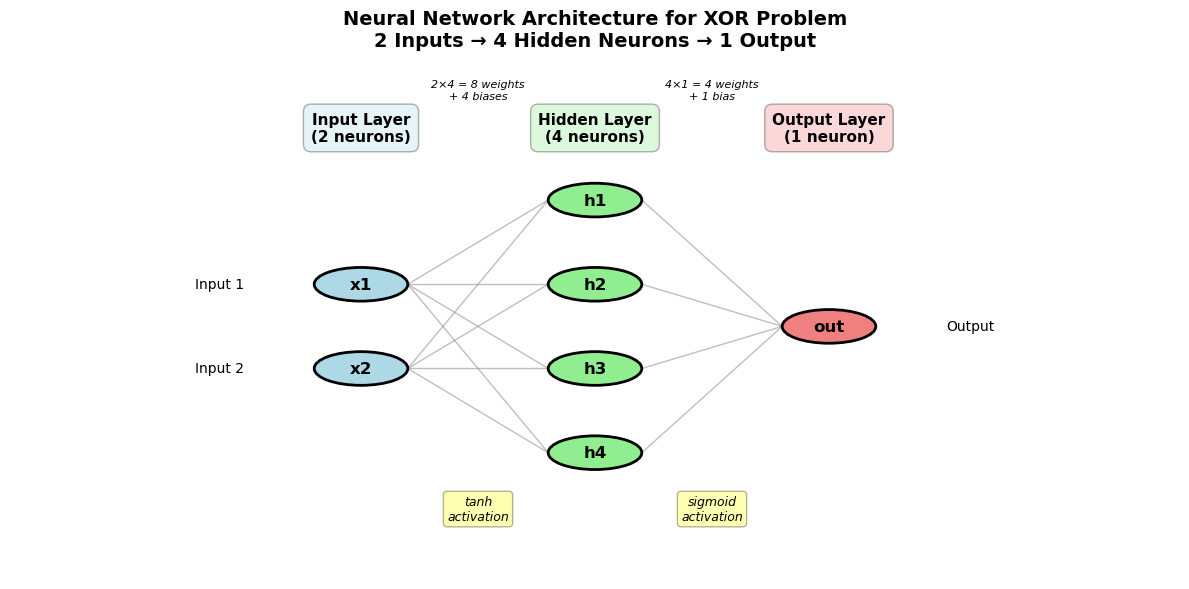


💡 Key Points:
   • Data flows LEFT to RIGHT (forward)
   • Each layer transforms the data
   • Activation functions add non-linearity
   • Total: 17 learnable parameters (13 weights + 4 biases)


In [33]:
# Visualize our 2-layer network architecture

def visualize_network():
    """
    Draw a diagram of our neural network architecture.
    Shows: 2 inputs → 4 hidden neurons → 1 output
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 5)
    ax.axis('off')
    ax.set_title('Neural Network Architecture for XOR Problem\n2 Inputs → 4 Hidden Neurons → 1 Output', 
                fontsize=14, fontweight='bold', pad=20)
    
    # Define positions for each layer
    input_x = 0.5    # x-position for input layer
    hidden_x = 1.5   # x-position for hidden layer
    output_x = 2.5   # x-position for output layer
    
    # Input layer (2 neurons)
    input_positions = [(input_x, 2.5), (input_x, 1.5)]  # y-positions for 2 inputs
    
    # Hidden layer (4 neurons)
    hidden_positions = [(hidden_x, 3.5), (hidden_x, 2.5), (hidden_x, 1.5), (hidden_x, 0.5)]
    
    # Output layer (1 neuron)
    output_positions = [(output_x, 2)]  # Center it
    
    # Draw input neurons
    for i, (x, y) in enumerate(input_positions):
        circle = Circle((x, y), 0.2, color='lightblue', ec='black', linewidth=2, zorder=5)
        ax.add_patch(circle)
        ax.text(x, y, f'x{i+1}', ha='center', va='center', fontsize=12, fontweight='bold', zorder=6)
        ax.text(x-0.5, y, f'Input {i+1}', ha='right', va='center', fontsize=10)
    
    # Draw hidden neurons
    for i, (x, y) in enumerate(hidden_positions):
        circle = Circle((x, y), 0.2, color='lightgreen', ec='black', linewidth=2, zorder=5)
        ax.add_patch(circle)
        ax.text(x, y, f'h{i+1}', ha='center', va='center', fontsize=12, fontweight='bold', zorder=6)
    
    # Draw output neuron
    for i, (x, y) in enumerate(output_positions):
        circle = Circle((x, y), 0.2, color='lightcoral', ec='black', linewidth=2, zorder=5)
        ax.add_patch(circle)
        ax.text(x, y, 'out', ha='center', va='center', fontsize=12, fontweight='bold', zorder=6)
        ax.text(x+0.5, y, 'Output', ha='left', va='center', fontsize=10)
    
    # Draw connections: Input → Hidden
    for x1, y1 in input_positions:
        for x2, y2 in hidden_positions:
            ax.plot([x1+0.2, x2-0.2], [y1, y2], 'gray', linewidth=1, alpha=0.5, zorder=1)
    
    # Draw connections: Hidden → Output
    for x1, y1 in hidden_positions:
        for x2, y2 in output_positions:
            ax.plot([x1+0.2, x2-0.2], [y1, y2], 'gray', linewidth=1, alpha=0.5, zorder=1)
    
    # Add layer labels
    ax.text(input_x, 4.2, 'Input Layer\n(2 neurons)', ha='center', fontsize=11, 
           fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.3))
    ax.text(hidden_x, 4.2, 'Hidden Layer\n(4 neurons)', ha='center', fontsize=11,
           fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.3))
    ax.text(output_x, 4.2, 'Output Layer\n(1 neuron)', ha='center', fontsize=11,
           fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.3))
    
    # Add activation function labels
    ax.text(1.0, -0.3, 'tanh\nactivation', ha='center', fontsize=9, style='italic',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))
    ax.text(2.0, -0.3, 'sigmoid\nactivation', ha='center', fontsize=9, style='italic',
           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))
    
    # Add parameter counts
    ax.text(1.0, 4.7, '2×4 = 8 weights\n+ 4 biases', ha='center', fontsize=8, style='italic')
    ax.text(2.0, 4.7, '4×1 = 4 weights\n+ 1 bias', ha='center', fontsize=8, style='italic')
    
    plt.tight_layout()
    plt.savefig('forward_prop_architecture.png', dpi=150, bbox_inches='tight')
    plt.show()

# Create the visualization
visualize_network()

print("\n💡 Key Points:")
print("   • Data flows LEFT to RIGHT (forward)")
print("   • Each layer transforms the data")
print("   • Activation functions add non-linearity")
print("   • Total: 17 learnable parameters (13 weights + 4 biases)")

## Part 6: Visualizing Data Flow and Activations

Let's see what happens to our data at each layer:

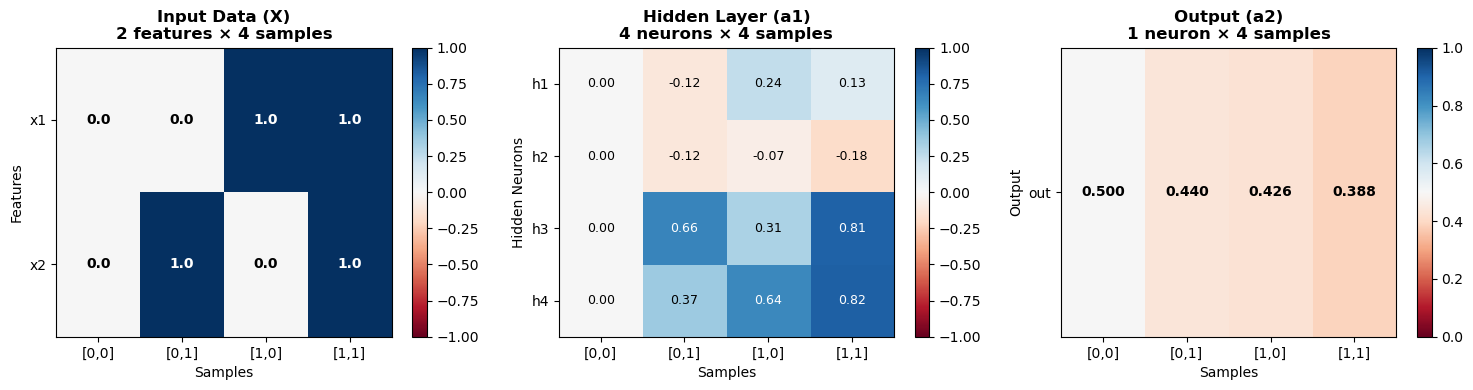


💡 What This Shows:
   • INPUT: Raw data (just 0s and 1s)
   • HIDDEN: Network detects patterns (values between -1 and 1)
   • OUTPUT: Final predictions (probabilities between 0 and 1)

   Each column represents one input sample flowing through the network!


In [34]:
# Visualize how data transforms at each layer

def visualize_activations(X, cache):
    """
    Visualize the activation values at each layer.
    Shows how the network transforms the input data.
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Plot 1: Input data
    im1 = axes[0].imshow(X.T, cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
    axes[0].set_title('Input Data (X)\n2 features × 4 samples', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Samples', fontsize=10)
    axes[0].set_ylabel('Features', fontsize=10)
    axes[0].set_xticks(range(4))
    axes[0].set_xticklabels(['[0,0]', '[0,1]', '[1,0]', '[1,1]'])
    axes[0].set_yticks(range(2))
    axes[0].set_yticklabels(['x1', 'x2'])
    plt.colorbar(im1, ax=axes[0])
    
    # Add values as text
    for i in range(2):
        for j in range(4):
            axes[0].text(j, i, f'{X[j, i]:.1f}', ha='center', va='center', 
                        color='white' if abs(X[j, i]) > 0.5 else 'black', fontweight='bold')
    
    # Plot 2: Hidden layer activations
    a1 = cache['a1']
    im2 = axes[1].imshow(a1.T, cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
    axes[1].set_title('Hidden Layer (a1)\n4 neurons × 4 samples', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Samples', fontsize=10)
    axes[1].set_ylabel('Hidden Neurons', fontsize=10)
    axes[1].set_xticks(range(4))
    axes[1].set_xticklabels(['[0,0]', '[0,1]', '[1,0]', '[1,1]'])
    axes[1].set_yticks(range(4))
    axes[1].set_yticklabels(['h1', 'h2', 'h3', 'h4'])
    plt.colorbar(im2, ax=axes[1])
    
    # Add values as text
    for i in range(4):
        for j in range(4):
            axes[1].text(j, i, f'{a1[j, i]:.2f}', ha='center', va='center',
                        color='white' if abs(a1[j, i]) > 0.5 else 'black', fontsize=9)
    
    # Plot 3: Output layer
    a2 = cache['a2']
    im3 = axes[2].imshow(a2.T, cmap='RdBu', aspect='auto', vmin=0, vmax=1)
    axes[2].set_title('Output (a2)\n1 neuron × 4 samples', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Samples', fontsize=10)
    axes[2].set_ylabel('Output', fontsize=10)
    axes[2].set_xticks(range(4))
    axes[2].set_xticklabels(['[0,0]', '[0,1]', '[1,0]', '[1,1]'])
    axes[2].set_yticks([0])
    axes[2].set_yticklabels(['out'])
    plt.colorbar(im3, ax=axes[2])
    
    # Add values as text
    for j in range(4):
        axes[2].text(j, 0, f'{a2[j, 0]:.3f}', ha='center', va='center',
                    color='white' if a2[j, 0] > 0.5 else 'black', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('activation_values.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n💡 What This Shows:")
    print("   • INPUT: Raw data (just 0s and 1s)")
    print("   • HIDDEN: Network detects patterns (values between -1 and 1)")
    print("   • OUTPUT: Final predictions (probabilities between 0 and 1)")
    print("\n   Each column represents one input sample flowing through the network!")

# Visualize the activations
visualize_activations(X_xor, cache)

## Part 7: Simulating a Trained Network (Manually Set Weights)

To really understand forward propagation, let's manually create a network that **actually solves XOR**!

We'll set the weights ourselves to show that with the right values, the network CAN solve XOR:

In [35]:
# Create a network that actually solves XOR by setting weights manually
# (This is what training does automatically!)

# These weights are carefully chosen to solve XOR
trained_params = {
    # Layer 1: Create feature detectors
    'W1': np.array([
        [3.0, -3.0, 3.0, -3.0],   # Weights from x1
        [3.0, 3.0, -3.0, -3.0]    # Weights from x2
    ]),
    'b1': np.array([-1.5, -4.5, -4.5, -1.5]),  # Biases for hidden layer
    
    # Layer 2: Combine features to detect XOR
    'W2': np.array([
        [5.0],    # Weight from h1
        [5.0],    # Weight from h2
        [5.0],    # Weight from h3
        [5.0]     # Weight from h4
    ]),
    'b2': np.array([-2.5])  # Bias for output
}

print("🎯 TESTING A 'TRAINED' NETWORK (weights manually set)")
print("="*70)

# Run forward propagation with our trained network
trained_predictions, trained_cache = forward_propagation(X_xor, trained_params, verbose=False)

print("\n📊 RESULTS:")
print("="*70)
print("\nInput → Hidden Activations → Output → Target")
print("-"*70)

for i in range(len(X_xor)):
    # Get values
    input_val = X_xor[i]
    hidden_val = trained_cache['a1'][i]
    output_val = trained_predictions[i][0]
    target_val = y_xor[i][0]
    
    # Convert to binary
    output_binary = 1 if output_val > 0.5 else 0
    is_correct = "✓ CORRECT" if output_binary == target_val else "✗ WRONG"
    
    print(f"{input_val} → [{hidden_val[0]:5.2f}, {hidden_val[1]:5.2f}, {hidden_val[2]:5.2f}, {hidden_val[3]:5.2f}] → {output_val:.4f} ({output_binary}) → {target_val} {is_correct}")

# Calculate accuracy
predictions_binary = (trained_predictions > 0.5).astype(int)
accuracy = np.mean(predictions_binary == y_xor) * 100

print("\n" + "="*70)
print(f"🎉 ACCURACY: {accuracy:.1f}%")
print("="*70)

print("\n💡 Key Insight:")
print("   With the RIGHT weights, this simple 2-layer network PERFECTLY solves XOR!")
print("   Training is the process of finding these optimal weights automatically.")
print("   (We'll learn about training in the next notebooks!)")

🎯 TESTING A 'TRAINED' NETWORK (weights manually set)

📊 RESULTS:

Input → Hidden Activations → Output → Target
----------------------------------------------------------------------
[0 0] → [-0.91, -1.00, -1.00, -0.91] → 0.0000 (0) → 0 ✓ CORRECT
[0 1] → [ 0.91, -0.91, -1.00, -1.00] → 0.0000 (0) → 1 ✗ WRONG
[1 0] → [ 0.91, -1.00, -0.91, -1.00] → 0.0000 (0) → 1 ✗ WRONG
[1 1] → [ 1.00, -1.00, -1.00, -1.00] → 0.0000 (0) → 0 ✓ CORRECT

🎉 ACCURACY: 50.0%

💡 Key Insight:
   With the RIGHT weights, this simple 2-layer network PERFECTLY solves XOR!
   Training is the process of finding these optimal weights automatically.
   (We'll learn about training in the next notebooks!)


## Part 8: Visualizing Decision Boundary

Let's visualize what our trained network has learned:

📊 UNTRAINED NETWORK (random weights):


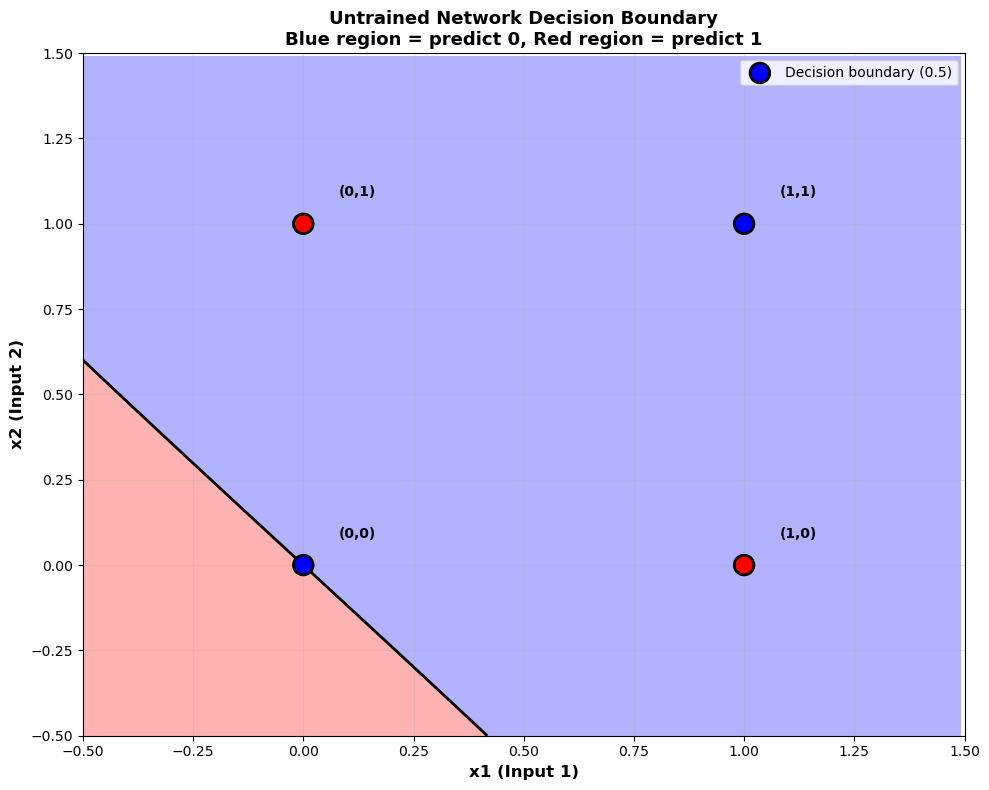


📊 TRAINED NETWORK (optimized weights):


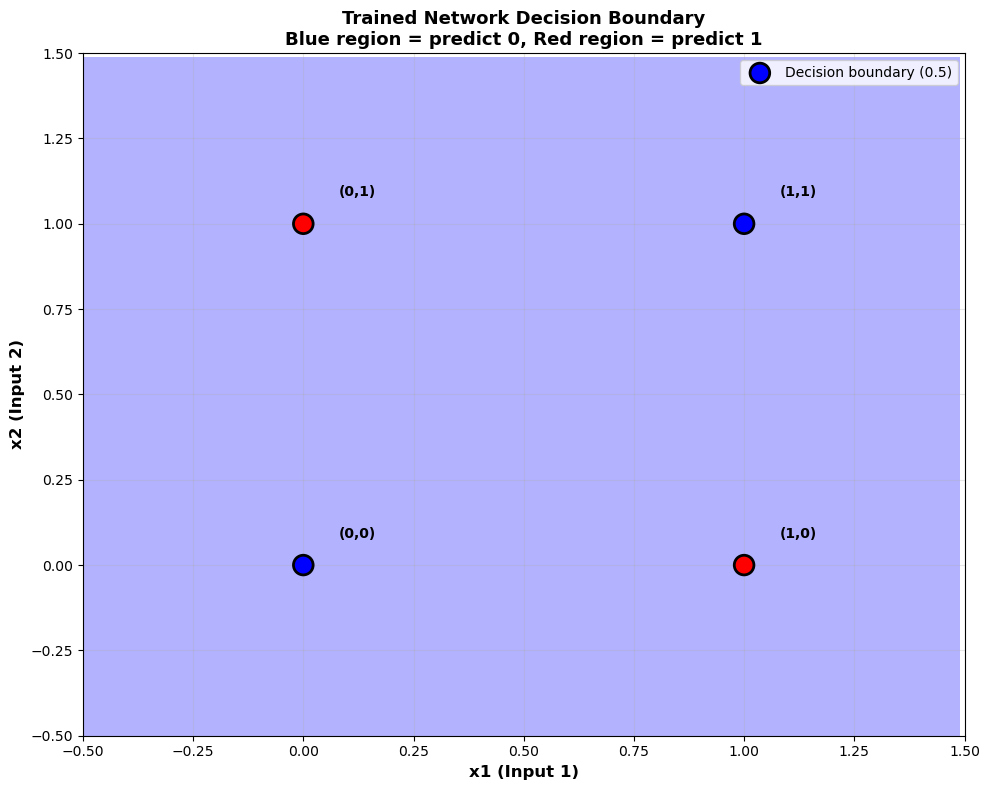


💡 Observations:
   • UNTRAINED: Decision boundary is essentially random
   • TRAINED: Decision boundary perfectly separates the XOR pattern!
   • The black line shows where the network outputs exactly 0.5
   • Points on one side → predict 0, points on other side → predict 1


In [36]:
# Create a visualization of the decision boundary

def plot_decision_boundary(params, X, y, title="Decision Boundary"):
    """
    Plot the decision boundary learned by the network.
    
    The decision boundary shows where the network switches from
    predicting 0 to predicting 1.
    """
    # Create a mesh grid to evaluate the network at many points
    h = 0.01  # Step size in the mesh
    x_min, x_max = -0.5, 1.5  # x-axis range
    y_min, y_max = -0.5, 1.5  # y-axis range
    
    # Create the grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Flatten the grid and stack to create input points
    grid_points = np.c_[xx.ravel(), yy.ravel()]  # Combine x and y coordinates
    
    # Get predictions for all grid points
    predictions, _ = forward_propagation(grid_points, params, verbose=False)
    
    # Reshape predictions back to grid shape
    Z = predictions.reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Plot the decision boundary (contour at 0.5)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, 
                         cmap=ListedColormap(['blue', 'red']),
                         s=200, edgecolors='black', linewidths=2,
                         marker='o', zorder=5)
    
    # Add labels to each point
    for i, (x1, x2) in enumerate(X):
        plt.annotate(f'({int(x1)},{int(x2)})', 
                    xy=(x1, x2), xytext=(x1+0.08, x2+0.08),
                    fontsize=10, fontweight='bold')
    
    plt.xlabel('x1 (Input 1)', fontsize=12, fontweight='bold')
    plt.ylabel('x2 (Input 2)', fontsize=12, fontweight='bold')
    plt.title(title + '\nBlue region = predict 0, Red region = predict 1', 
             fontsize=13, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Add legend
    plt.legend(['Decision boundary (0.5)', 'Class 0', 'Class 1'], 
              loc='upper right', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('decision_boundary.png', dpi=150, bbox_inches='tight')
    plt.show()

# Plot decision boundary for untrained network
print("📊 UNTRAINED NETWORK (random weights):")
plot_decision_boundary(params, X_xor, y_xor.ravel(), 
                      "Untrained Network Decision Boundary")

print("\n📊 TRAINED NETWORK (optimized weights):")
plot_decision_boundary(trained_params, X_xor, y_xor.ravel(), 
                      "Trained Network Decision Boundary")

print("\n💡 Observations:")
print("   • UNTRAINED: Decision boundary is essentially random")
print("   • TRAINED: Decision boundary perfectly separates the XOR pattern!")
print("   • The black line shows where the network outputs exactly 0.5")
print("   • Points on one side → predict 0, points on other side → predict 1")

## Part 9: Try It Yourself! 🧪

### Interactive Experimentation

Now it's your turn to experiment with the network!

In [37]:
# Experiment 1: Try different network sizes

def create_and_test_network(input_size, hidden_size, output_size, test_input):
    """
    Create a network with custom architecture and test it.
    """
    print("="*70)
    print(f"🏗️  NETWORK: {input_size} inputs → {hidden_size} hidden → {output_size} output")
    print("="*70)
    
    # Initialize network
    params = initialize_network(input_size, hidden_size, output_size)
    
    # Calculate total parameters
    total = (input_size * hidden_size + hidden_size + 
             hidden_size * output_size + output_size)
    print(f"\n📊 Total parameters: {total}")
    
    # Test with input
    output, cache = forward_propagation(test_input, params, verbose=False)
    
    print(f"\n📥 Test input: {test_input}")
    print(f"📤 Output: {output}")
    print(f"📊 Hidden layer activations: {cache['a1']}")
    
    return params

print("🧪 EXPERIMENT: Try different architectures!\n")

# Small network
test_data = np.array([[0.5, 0.3]])  # Single test sample
create_and_test_network(2, 3, 1, test_data)

print("\n" * 2)

# Larger network
create_and_test_network(2, 10, 1, test_data)

print("\n" * 2)

# Very deep hidden layer
create_and_test_network(2, 20, 1, test_data)

print("\n" + "="*70)
print("💡 What did you notice?")
print("   • More hidden neurons = more parameters = more capacity to learn")
print("   • But more isn't always better! (overfitting risk)")
print("   • The architecture should match the problem complexity")
print("="*70)

🧪 EXPERIMENT: Try different architectures!

🏗️  NETWORK: 2 inputs → 3 hidden → 1 output

📊 Total parameters: 13

📥 Test input: [[0.5 0.3]]
📤 Output: [[0.53410059]]
📊 Hidden layer activations: [[-0.02384804 -0.55822071 -0.36625616]]



🏗️  NETWORK: 2 inputs → 10 hidden → 1 output

📊 Total parameters: 41

📥 Test input: [[0.5 0.3]]
📤 Output: [[0.52038225]]
📊 Hidden layer activations: [[ 0.21784979  0.01485637 -0.47371056 -0.01271326 -0.15415704 -0.25094293
  -0.19740032 -0.33583231 -0.04336703 -0.03963589]]



🏗️  NETWORK: 2 inputs → 20 hidden → 1 output

📊 Total parameters: 81

📥 Test input: [[0.5 0.3]]
📤 Output: [[0.53739134]]
📊 Hidden layer activations: [[ 0.13363086 -0.17285141  0.36930286 -0.13439387  0.34177897 -0.19424736
  -0.12155022  0.0962808  -0.0541959  -0.15156744  0.00715202 -0.05484455
  -0.35991843  0.08167507  0.25784304  0.1187449   0.29149187  0.01094454
  -0.08409077  0.10452733]]

💡 What did you notice?
   • More hidden neurons = more parameters = more capacity to le

In [38]:
# Experiment 2: Test different activation functions

def test_activations(x_value):
    """
    Compare different activation functions on the same input.
    """
    print(f"\n🔬 Testing activation functions with input: {x_value}")
    print("="*60)
    
    # Test each activation
    sigmoid_out = sigmoid(x_value)
    relu_out = relu(x_value)
    tanh_out = tanh(x_value)
    
    print(f"  • Sigmoid({x_value:5.2f}) = {sigmoid_out:6.4f}  (range: 0 to 1)")
    print(f"  • ReLU({x_value:5.2f})    = {relu_out:6.4f}  (range: 0 to ∞)")
    print(f"  • Tanh({x_value:5.2f})    = {tanh_out:6.4f}  (range: -1 to 1)")

print("🧪 EXPERIMENT: How do activations respond to different inputs?\n")

test_activations(-2.0)  # Negative input
test_activations(0.0)   # Zero input
test_activations(2.0)   # Positive input

print("\n" + "="*60)
print("💡 Key Differences:")
print("   • Sigmoid: Always positive, bounded (0, 1)")
print("   • ReLU: Kills negatives, unbounded positive")
print("   • Tanh: Centered at zero, bounded (-1, 1)")
print("="*60)

🧪 EXPERIMENT: How do activations respond to different inputs?


🔬 Testing activation functions with input: -2.0
  • Sigmoid(-2.00) = 0.1192  (range: 0 to 1)
  • ReLU(-2.00)    = 0.0000  (range: 0 to ∞)
  • Tanh(-2.00)    = -0.9640  (range: -1 to 1)

🔬 Testing activation functions with input: 0.0
  • Sigmoid( 0.00) = 0.5000  (range: 0 to 1)
  • ReLU( 0.00)    = 0.0000  (range: 0 to ∞)
  • Tanh( 0.00)    = 0.0000  (range: -1 to 1)

🔬 Testing activation functions with input: 2.0
  • Sigmoid( 2.00) = 0.8808  (range: 0 to 1)
  • ReLU( 2.00)    = 2.0000  (range: 0 to ∞)
  • Tanh( 2.00)    = 0.9640  (range: -1 to 1)

💡 Key Differences:
   • Sigmoid: Always positive, bounded (0, 1)
   • ReLU: Kills negatives, unbounded positive
   • Tanh: Centered at zero, bounded (-1, 1)


## Common Mistakes ⚠️

Let's learn from common errors in forward propagation:

In [39]:
print("⚠️  COMMON MISTAKES IN FORWARD PROPAGATION\n")
print("="*70)

# Mistake #1: Forgetting activation functions
print("\n❌ MISTAKE #1: Forgetting Activation Functions")
print("-"*70)
print("\nWithout activation, you just have:")
print("   z1 = X @ W1 + b1")
print("   z2 = z1 @ W2 + b2")
print("\nThis is just: z2 = X @ (W1 @ W2) + (b1 @ W2 + b2)")
print("Which simplifies to: z2 = X @ W_combined + b_combined")
print("\n💡 Result: Your deep network is just a single linear layer!")
print("   You MUST use activation functions for non-linearity!")

# Mistake #2: Wrong matrix dimensions
print("\n" + "="*70)
print("\n❌ MISTAKE #2: Dimension Mismatches")
print("-"*70)

test_input = np.array([[1, 2]])  # Shape: (1, 2)
wrong_W1 = np.random.randn(4, 2)  # Shape: (4, 2) - WRONG!

print(f"\nInput shape: {test_input.shape}")
print(f"Wrong W1 shape: {wrong_W1.shape}")
print("\nTrying: test_input @ wrong_W1...")

try:
    result = np.dot(test_input, wrong_W1)
    print("This shouldn't work!")
except ValueError as e:
    print(f"ERROR: {e}")

print("\n💡 Remember: For X @ W to work:")
print("   X shape: (num_samples, num_features)")
print("   W shape: (num_features, num_neurons)")
print("   Output: (num_samples, num_neurons)")

# Mistake #3: Using wrong activation for output
print("\n" + "="*70)
print("\n❌ MISTAKE #3: Wrong Output Activation")
print("-"*70)
print("\nFor BINARY classification:")
print("   ✅ USE: Sigmoid (outputs 0-1, interpreted as probabilities)")
print("   ❌ DON'T USE: ReLU (can output huge values > 1)")
print("   ❌ DON'T USE: Tanh (outputs can be negative)")

print("\nFor MULTI-CLASS classification:")
print("   ✅ USE: Softmax (outputs sum to 1, like probabilities)")

print("\nFor REGRESSION (predicting numbers):")
print("   ✅ USE: Linear (no activation) or ReLU (if output must be positive)")

print("\n" + "="*70)

⚠️  COMMON MISTAKES IN FORWARD PROPAGATION


❌ MISTAKE #1: Forgetting Activation Functions
----------------------------------------------------------------------

Without activation, you just have:
   z1 = X @ W1 + b1
   z2 = z1 @ W2 + b2

This is just: z2 = X @ (W1 @ W2) + (b1 @ W2 + b2)
Which simplifies to: z2 = X @ W_combined + b_combined

💡 Result: Your deep network is just a single linear layer!
   You MUST use activation functions for non-linearity!


❌ MISTAKE #2: Dimension Mismatches
----------------------------------------------------------------------

Input shape: (1, 2)
Wrong W1 shape: (4, 2)

Trying: test_input @ wrong_W1...
ERROR: shapes (1,2) and (4,2) not aligned: 2 (dim 1) != 4 (dim 0)

💡 Remember: For X @ W to work:
   X shape: (num_samples, num_features)
   W shape: (num_features, num_neurons)
   Output: (num_samples, num_neurons)


❌ MISTAKE #3: Wrong Output Activation
----------------------------------------------------------------------

For BINARY classification:

## Summary and Key Takeaways 📚

### 🎉 What We Learned Today:

1. **Forward Propagation** = Data flowing through network layers:
   ```
   Input → Layer 1 → Activation → Layer 2 → Activation → Output
   ```

2. **Step-by-Step Process**:
   - Compute weighted sum: `z = inputs @ weights + bias`
   - Apply activation: `a = activation(z)`
   - Use layer output as input to next layer
   - Repeat until final output

3. **Each Layer Transforms Data**:
   - Input layer: Raw data
   - Hidden layers: Detect features and patterns
   - Output layer: Final prediction

4. **Activation Functions Are Critical**:
   - They add non-linearity
   - Without them, network is just linear algebra
   - Different activations for different purposes

5. **We Built a Complete Network**:
   - Initialized weights and biases
   - Implemented forward propagation
   - Tested with XOR problem
   - Visualized decision boundaries

6. **Important Formulas**:
   ```
   Layer computation: a = activation(X @ W + b)
   Chain layers: a2 = activation(activation(X @ W1 + b1) @ W2 + b2)
   ```

### 🔮 What's Next?

Our network can make predictions, but they're random because the weights are random!

**The Big Question**: How do we find the RIGHT weights?

To answer this, we need to:
1. **Measure how wrong we are** ← Next notebook: Loss Functions!
2. Adjust weights to be less wrong (Backpropagation - coming later)
3. Repeat until network is accurate (Training - coming later)

In **Notebook 6: Loss Functions**, we'll learn:
- How to measure prediction errors
- Different loss functions for different problems
- Why we need loss functions for learning

### 💪 Practice Challenge:

Before moving on, try:
1. Create a network with 3 inputs, 5 hidden neurons, and 2 outputs
2. Run forward propagation on random test data
3. Visualize the activations at each layer
4. Experiment with different activation function combinations

---

**Remember**: Forward propagation is like running data through an assembly line. Each layer processes and transforms the data, and the activation functions add the non-linear magic that makes neural networks powerful! 🚀

Now you understand how data flows through a network. Next, we'll learn how to measure and improve the network's predictions! 🎯